In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline


In [2]:
violence = pd.read_csv('violence.csv')

In [3]:
violence

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F20,F21,F22,F23,F24,F25,F26,F27,F28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [4]:
violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F1      284807 non-null  float64
 1   F2      284807 non-null  float64
 2   F3      284807 non-null  float64
 3   F4      284807 non-null  float64
 4   F5      284807 non-null  float64
 5   F6      284807 non-null  float64
 6   F7      284807 non-null  float64
 7   F8      284807 non-null  float64
 8   F9      284807 non-null  float64
 9   F10     284807 non-null  float64
 10  F11     284807 non-null  float64
 11  F12     284807 non-null  float64
 12  F13     284807 non-null  float64
 13  F14     284807 non-null  float64
 14  F15     284807 non-null  float64
 15  F16     284807 non-null  float64
 16  F17     284807 non-null  float64
 17  F18     284807 non-null  float64
 18  F19     284807 non-null  float64
 19  F20     284807 non-null  float64
 20  F21     284807 non-null  float64
 21  F22     28

Task 1: Choosing an Evaluation Metric

For the evaluation metric, I'll use F1 score, as it balances precision and recall, making it suitable for imbalanced datasets like this one. Since instances of escalation (likely coded as 1) are usually rarer than non-escalation (0), F1 can provide a clearer picture of model performance on the minority class without overemphasizing true negatives, as accuracy might do in this scenario.

I will also evaluate using the AUC-ROC Curve

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [6]:
# Splitting the data into training and test sets
X = violence.drop(columns=['Class'])
y = violence['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [8]:
# Standardizing the features for logistic regression
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#check class balance in training set
y_train.value_counts(normalize=True)



Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

In [10]:
# Model 1: Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [11]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_logistic)


array([[85280,    15],
       [   56,    92]])

In [12]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [13]:
# Model 2: Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)


In [14]:
#print confusion matrix
confusion_matrix(y_test, y_pred_rf)


array([[85291,     4],
       [   38,   110]])

In [15]:
#print classification report
print(classification_report(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Best threshold for Logistic Regression: 1.00
Confusion Matrix - Logistic Regression with ADASYN and Threshold Tuning:
[[56848    16]
 [   23    75]]
Classification Report - Logistic Regression with ADASYN and Threshold Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.77      0.79        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



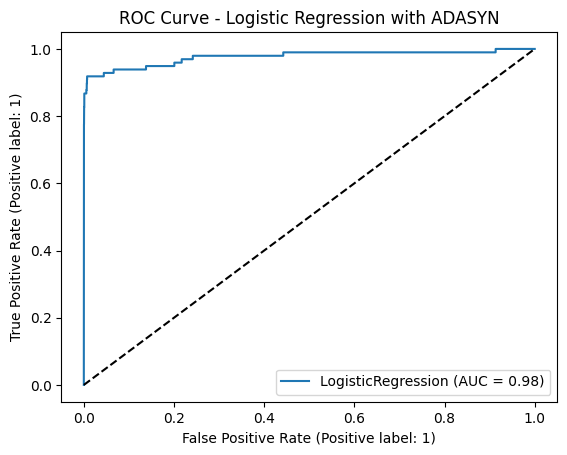

Confusion Matrix - Random Forest with ADASYN:
[[56851    13]
 [   15    83]]
Classification Report - Random Forest with ADASYN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



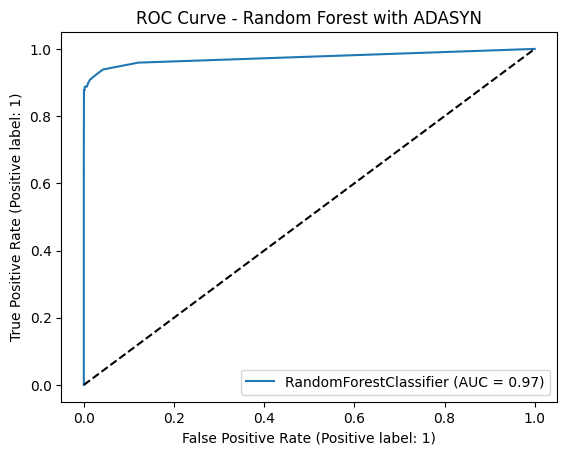

In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    RocCurveDisplay, 
    precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is already loaded in X and y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN for resampling the minority class
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

### Logistic Regression with ADASYN ###

# Train the logistic regression model on ADASYN data
logistic_model_adasyn = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Predict probabilities for threshold tuning
y_proba_logistic = logistic_model_adasyn.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve for threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_logistic)

# Calculate F1 score at each threshold and choose the best one
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for Logistic Regression: {best_threshold:.2f}")

# Make predictions based on best threshold
y_pred_logistic_custom_threshold = (y_proba_logistic >= best_threshold).astype(int)

# Print confusion matrix and classification report
print("Confusion Matrix - Logistic Regression with ADASYN and Threshold Tuning:")
print(confusion_matrix(y_test, y_pred_logistic_custom_threshold))
print("Classification Report - Logistic Regression with ADASYN and Threshold Tuning:")
print(classification_report(y_test, y_pred_logistic_custom_threshold))

# Plot ROC Curve
RocCurveDisplay.from_estimator(logistic_model_adasyn, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression with ADASYN')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### Random Forest with ADASYN ###

# Train a Random Forest model on ADASYN data
rf_model_adasyn = RandomForestClassifier(random_state=42)
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred_rf = rf_model_adasyn.predict(X_test_scaled)

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix - Random Forest with ADASYN:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report - Random Forest with ADASYN:")
print(classification_report(y_test, y_pred_rf))

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model_adasyn, X_test_scaled, y_test)
plt.title('ROC Curve - Random Forest with ADASYN')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()


SMOTETOMEK

Best threshold for Logistic Regression: 1.00
Confusion Matrix - Logistic Regression with SMOTETomek and Threshold Tuning:
[[56851    13]
 [   23    75]]
Classification Report - Logistic Regression with SMOTETomek and Threshold Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



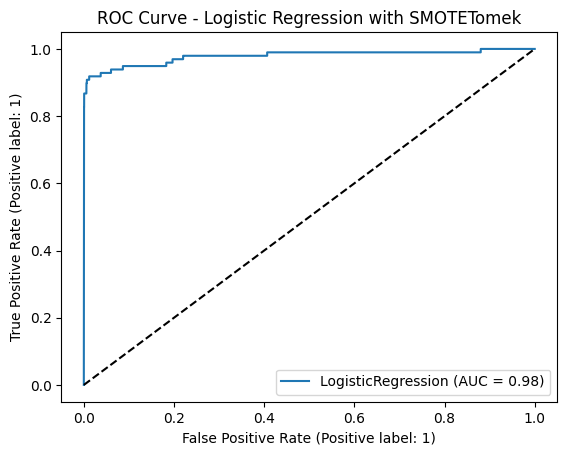

Confusion Matrix - Random Forest with SMOTETomek:
[[56853    11]
 [   16    82]]
Classification Report - Random Forest with SMOTETomek:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



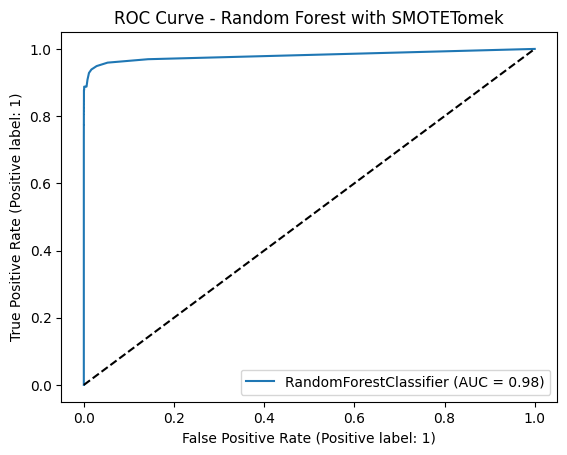

In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    RocCurveDisplay, 
    precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is already loaded in X and y
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTETomek for resampling the minority class
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

### Logistic Regression with SMOTETomek ###

# Train the logistic regression model on SMOTETomek data
logistic_model_smotetomek = LogisticRegression(random_state=42, max_iter=1000)
logistic_model_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Predict probabilities for threshold tuning
y_proba_logistic = logistic_model_smotetomek.predict_proba(X_test_scaled)[:, 1]

# Precision-recall curve for threshold tuning
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_logistic)

# Calculate F1 score at each threshold and choose the best one
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold for Logistic Regression: {best_threshold:.2f}")

# Make predictions based on best threshold
y_pred_logistic_custom_threshold = (y_proba_logistic >= best_threshold).astype(int)

# Print confusion matrix and classification report
print("Confusion Matrix - Logistic Regression with SMOTETomek and Threshold Tuning:")
print(confusion_matrix(y_test, y_pred_logistic_custom_threshold))
print("Classification Report - Logistic Regression with SMOTETomek and Threshold Tuning:")
print(classification_report(y_test, y_pred_logistic_custom_threshold))

# Plot ROC Curve
RocCurveDisplay.from_estimator(logistic_model_smotetomek, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression with SMOTETomek')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### Random Forest with SMOTETomek ###

# Train a Random Forest model on SMOTETomek data
rf_model_smotetomek = RandomForestClassifier(random_state=42)
rf_model_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Make predictions
y_pred_rf = rf_model_smotetomek.predict(X_test_scaled)

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix - Random Forest with SMOTETomek:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report - Random Forest with SMOTETomek:")
print(classification_report(y_test, y_pred_rf))

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model_smotetomek, X_test_scaled, y_test)
plt.title('ROC Curve - Random Forest with SMOTETomek')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
